Predicted label: 5


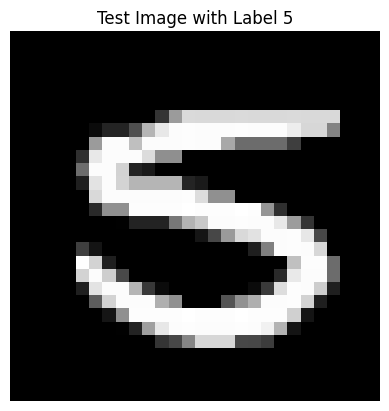

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 重新调整测试图像的形状，添加单通道维度
test_images = test_images[..., np.newaxis]

# 找到标签为5的图片的索引
indices_label_5 = np.where(test_labels == 5)[0]
# 从中随机选择一个索引
index = np.random.choice(indices_label_5)
test_image = test_images[index]

# 假设您已经加载了模型，并且模型保存在saved_model_path变量中
saved_model_path = "model"
loaded_model = tf.saved_model.load(saved_model_path)

# 获取模型的默认签名函数
predict_fn = loaded_model.signatures["serving_default"]

# 将图像归一化到[0, 1]区间，并转换为float32类型
test_image_np = test_image / 255.0
test_image_np = test_image_np.astype(np.float32)

# 准备输入张量，添加批次维度
input_tensor = tf.convert_to_tensor(test_image_np[None, :, :, :])

# 进行预测
output_dict = predict_fn(input_tensor)

# 获取预测结果，这里假设输出的张量名称是'output_1'
predictions = output_dict['output_1']

# 将预测结果转换为NumPy数组
predictions_np = predictions.numpy()

# 获取最可能的类别
predicted_label = np.argmax(predictions_np[0])

# 打印预测结果
print("Predicted label:", predicted_label)


# 将 TensorFlow 张量转换为 NumPy 数组，并去除单维度
test_image_np = test_image.squeeze()

# 显示图像
plt.imshow(test_image_np, cmap='gray')  # 使用灰度色彩映射显示图像
plt.axis('off')  # 隐藏坐标轴
plt.title('Test Image with Label 5')
plt.show()